## Importing Packages

In [107]:
import sys
sys.path.append('c:/users/asoum/anaconda3/lib/site-packages')   #Change the library path

import random
import os
import gym
import numpy as np
from matplotlib import pyplot
from matplotlib.legend_handler import HandlerLineCollection, HandlerTuple
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d.axes3d import get_test_data
from collections import defaultdict
from functools import partial
%matplotlib inline
plt.style.use('ggplot')
import time   


env = gym.make('Blackjack-v1') #Creating environment for storing the states, values and rewards
new_step_api=True

C:\Users\asoum\anaconda3\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\asoum\anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


# Black Jack Game
## Deck of Cards: Definition and Design

In [13]:
# The card class definition
class Card:
    def __init__(self, suit, value, card_value):
         
        # Card suit (Eg: Spade)
        self.suit = suit
 
        # Card Notations (Eg: A for Ace)
        self.value = value
 
        # Card Score (Eg: Q = 10)
        self.card_value = card_value
 
# Clear the terminal
def clear():
    os.system("clear")

In [14]:
# Print the cards
def print_cards(cards, hidden):
         
    s = ""
    for card in cards:
        s = s + "\t ________________"
    if hidden:
        s += "\t ________________"
    print(s)
 
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|                |"    
    print(s)
 
    s = ""
    for card in cards:
        if card.value == '10':
            s = s + "\t|  {}            |".format(card.value)
        else:
            s = s + "\t|  {}             |".format(card.value)  
    if hidden:
        s += "\t|                |"    
    print(s)
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|      * *       |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|    *     *     |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|   *       *    |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|   *       *    |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|       {}        |".format(card.suit)
    if hidden:
        s += "\t|          *     |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|         *      |"
    print(s)    
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|        *       |"
    print(s)
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|                |"
    print(s)
 
    s = ""
    for card in cards:
        s = s + "\t|                |"
    if hidden:
        s += "\t|                |"
    print(s)    
 
    s = ""
    for card in cards:
        if card.value == '10':
            s = s + "\t|            {}  |".format(card.value)
        else:
            s = s + "\t|            {}   |".format(card.value)
    if hidden:
        s += "\t|        *       |"        
    print(s)    
         
    s = ""
    for card in cards:
        s = s + "\t|________________|"
    if hidden:
        s += "\t|________________|"
    print(s)        
 
    print()

## Game Definition and Score Calculations

In [15]:
# Game of black jack
def blackjack_game(deck):
 
    # Cards for both dealer and player
    player_cards = []
    dealer_cards = []
 
    # Scores for both dealer and player
    player_score = 0
    dealer_score = 0
 
    clear()
 
    # Player and dealer's first deal
    while len(player_cards) < 2:
 
        # Dealing a card randomly
        player_card = random.choice(deck)
        player_cards.append(player_card)
        deck.remove(player_card)
 
        # Updating the player score
        player_score += player_card.card_value
 
        # If both cards dealt are Ace, make the value of first ace dealt as 1 
        if len(player_cards) == 2:
            if player_cards[0].card_value == 11 and player_cards[1].card_value == 11:
                player_cards[0].card_value = 1
                player_score -= 10
 
        # Print player cards and score      
        print("PLAYER CARDS: ")
        print_cards(player_cards, False)
        print("PLAYER SCORE = ", player_score)
 
        input()
 
        # Dealing a card randomly
        dealer_card = random.choice(deck)
        dealer_cards.append(dealer_card)
        deck.remove(dealer_card)
 
        # Dealer score
        dealer_score += dealer_card.card_value
 
        # Printing the score of the face up card of the dealer
        print("DEALER CARDS: ")
        if len(dealer_cards) == 1:
            print_cards(dealer_cards, False)
            print("DEALER SCORE = ", dealer_score)
        else:
            print_cards(dealer_cards[:-1], True)    
            print("DEALER SCORE = ", dealer_score - dealer_cards[-1].card_value)
 
 
        # If both cards dealt are Ace, make the value of first ace dealt as 1  
        if len(dealer_cards) == 2:
            if dealer_cards[0].card_value == 11 and dealer_cards[1].card_value == 11:
                dealer_cards[1].card_value = 1
                dealer_score -= 10
 
        input()
 
    # Player gets a blackjack   
    if player_score == 21:
        print("PLAYER HAS A BLACKJACK!!!!")
        print("PLAYER WINS!!!!")
        quit()
 
    clear()
 
    # Print dealer and player cards
    print("DEALER CARDS: ")
    print_cards(dealer_cards[:-1], True)
    print("DEALER SCORE = ", dealer_score - dealer_cards[-1].card_value)
 
    print("Press Enter") 
 
    print("PLAYER CARDS: ")
    print_cards(player_cards, False)
    print("PLAYER SCORE = ", player_score)

## Managing Player and Dealer Moves

In [ ]:
    # Managing the player moves
    while player_score < 21:
        choice = input("Enter H to Hit or S to Stand : ")
 
        # Choice validation
        if len(choice) != 1 or (choice.upper() != 'H' and choice.upper() != 'S'):
            clear()
            print("Wrong choice!! Try Again")
 
        # If player HIT
        if choice.upper() == 'H':
 
            # Dealing a new card
            player_card = random.choice(deck)
            player_cards.append(player_card)
            deck.remove(player_card)
 
            # Updating player score
            player_score += player_card.card_value
 
            # Updating player score if ace has been dealt with
            c = 0
            while player_score > 21 and c < len(player_cards):
                if player_cards[c].card_value == 11:
                    player_cards[c].card_value = 1
                    player_score -= 10
                    c += 1
                else:
                    c += 1 
 
            clear()     
 
            # Print player and dealer cards
            print("DEALER CARDS: ")
            print_cards(dealer_cards[:-1], True)
            print("DEALER SCORE = ", dealer_score - dealer_cards[-1].card_value)
 
            print()
 
            print("PLAYER CARDS: ")
            print_cards(player_cards, False)
            print("PLAYER SCORE = ", player_score)
             
        # If player decides to Stand
        if choice.upper() == 'S':
            break
 
 
    clear() 
 
    # Print player and dealer cards
    print("PLAYER CARDS: ")
    print_cards(player_cards, False)
    print("PLAYER SCORE = ", player_score)
 
    print()
    print("DEALER IS REVEALING THE CARDS....")
 
    print("DEALER CARDS: ")
    print_cards(dealer_cards, False)
    print("DEALER SCORE = ", dealer_score)
 
    # Check if player has a Blackjack
    if player_score == 21:
        print("PLAYER HAS A BLACKJACK")
        quit()
 
    # Check if player busts
    if player_score > 21:
        print("PLAYER BUSTED!!! GAME OVER!!!")
        quit()
 
    input() 
 
    # Managing the dealer moves
    while dealer_score < 17:
        clear() 
 
        print("DEALER DECIDES TO HIT.....")
 
        # Dealing card for dealer
        dealer_card = random.choice(deck)
        dealer_cards.append(dealer_card)
        deck.remove(dealer_card)
 
        # Updating the dealer's score
        dealer_score += dealer_card.card_value
 
        # Updating player score in case player's card have ace in them
        c = 0
        while dealer_score > 21 and c < len(dealer_cards):
            if dealer_cards[c].card_value == 11:
                dealer_cards[c].card_value = 1
                dealer_score -= 10
                c += 1
            else:
                c += 1
 
        # print player and dealer cards
        print("PLAYER CARDS: ")
        print_cards(player_cards, False)
        print("PLAYER SCORE = ", player_score)
 
        print()
 
        print("DEALER CARDS: ")
        print_cards(dealer_cards, False)
        print("DEALER SCORE = ", dealer_score)      
 
        input()
 
    # Dealer busts
    if dealer_score > 21:        
        print("DEALER BUSTED!!! YOU WIN!!!") 
        quit()  
 
    # Dealer gets a blackjack
    elif dealer_score == 21:
        print("DEALER HAS A BLACKJACK!!! PLAYER LOSES")
        quit()
 
    # TIE Game
    elif dealer_score == player_score:
        print("TIE GAME!!!!")
        quit()
 
    # Player Wins
    elif player_score <= 21 and player_score > dealer_score:
        print("PLAYER WINS!!!")  
        quit()
 
    # Dealer Wins
    else:
        print("DEALER WINS!!!") 
        quit()

In [16]:
if __name__ == '__main__':
 
    # The type of suit
    suits = ["Spades", "Hearts", "Clubs", "Diamonds"]
 
    # The suit value 
    #suits_values = {"Spades":"\u2664", "Hearts":"\u2661", "Clubs": "\u2667", "Diamonds": "\u2662"}
    suits_values = {"Spades":"\u2660","Hearts":"\u2764", "Clubs": "\u2663", "Diamonds": "\u2666"}
  
    # The type of card
    cards = ["A", "2", "3", "4", "5", "6", "7", "8", "9", "10", "J", "Q", "K"]
 
    # The card value
    cards_values = {"A": 11, "2":2, "3":3, "4":4, "5":5, "6":6, "7":7, "8":8, "9":9, "10":10, "J":10, "Q":10, "K":10}
 
    # The deck of cards
    deck = []
 
    # Loop for every type of suit
    for suit in suits:
 
        # Loop for every type of card in a suit
        for card in cards:
 
            # Adding card to the deck
            deck.append(Card(suits_values[suit], card, cards_values[card]))
     
    blackjack_game(deck) 

PLAYER CARDS: 
	 ________________
	|                |
	|  Q             |
	|                |
	|                |
	|                |
	|                |
	|       ♣        |
	|                |
	|                |
	|                |
	|                |
	|            Q   |
	|________________|

PLAYER SCORE =  10

DEALER CARDS: 
	 ________________
	|                |
	|  10            |
	|                |
	|                |
	|                |
	|                |
	|       ❤        |
	|                |
	|                |
	|                |
	|                |
	|            10  |
	|________________|

DEALER SCORE =  10

PLAYER CARDS: 
	 ________________	 ________________
	|                |	|                |
	|  Q             |	|  8             |
	|                |	|                |
	|                |	|                |
	|                |	|                |
	|                |	|                |
	|       ♣        |	|       ♣        |
	|                |	|                |
	|    

# Monte Carlo Prediction

In [8]:
def policies(observation):     #If score of hand dealt is less than 17  hit or else stand
    player_score, dealer_score, usable_ace = observation
    return 0 if player_score >= 17 else 1    #0-Stand and 1-Hit

def game(policy, env): #Simulate a game
    
    states, actions, rewards = [], [], []
    observation = env.reset()  #Initialising environment
    
    while True:
        states.append(observation) #Append state information
        action = policy(observation) 
        actions.append(action) #Append action information
        observation, reward, done, info = env.step(action)
        rewards.append(reward) #Append reward information
        
        # Break if the state is a terminal state (i.e. done)
        if done:
             break
                
    return states, actions, rewards

C:\Users\asoum\anaconda3\lib\site-packages\gym\core.py:329: DeprecationWarning: WARN: Initializing wrapper in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(
C:\Users\asoum\anaconda3\lib\site-packages\gym\wrappers\step_api_compatibility.py:39: DeprecationWarning: WARN: Initializing environment in old step API which returns one bool instead of two. It is recommended to set `new_step_api=True` to use new step API. This will be the default behaviour in future.
  deprecation(


In [3]:
def mc_prediction(policy, env, n_episodes):
    
    value_table = defaultdict(float) #Table to store values of each state
    N = defaultdict(int)

    
    for _ in range(n_episodes):
    
        states, _, rewards = game(policy, env) #For each iteration store state and reward information
        returns = 0
        
        for t in range(len(states) - 1, -1, -1):  
            R = rewards[t]  #Rewards
            S = states[t]   #States         
            returns += R
            
            if S not in states[:t]:       #Check if the episode is visited for first time
                N[S] += 1
                value_table[S] += (returns - value_table[S]) / N[S]
    
    return value_table
 
value = mc_prediction(policies, env, n_episodes=500000)


for i in range(10):
  print(value.popitem())

((5, 1, False), -0.4808988764044943)
((4, 3, False), -0.15763546798029557)
((12, 4, True), 0.08888888888888889)
((13, 1, True), -0.34070796460176994)
((4, 4, False), -0.27106227106227093)
((4, 9, False), -0.2857142857142857)
((13, 4, True), -0.02935010482180295)
((12, 8, True), 0.14678899082568797)
((4, 8, False), -0.1822222222222222)
((4, 1, False), -0.5570776255707761)


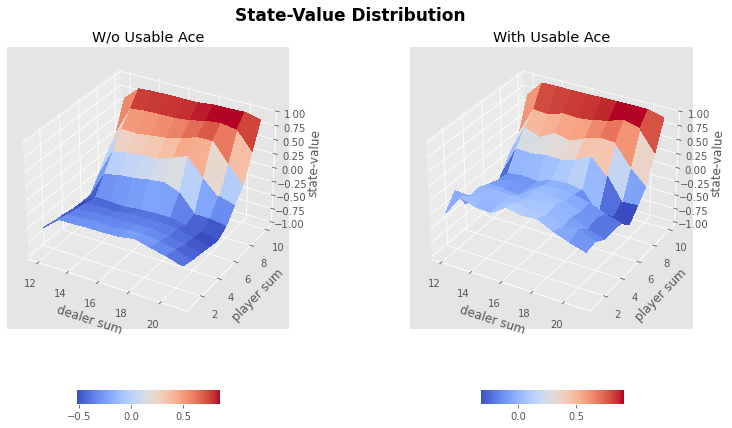

In [18]:
# set up a figure twice as wide as it is tall
fig = plt.figure(figsize=plt.figaspect(0.5))

# =============
# First subplot
# =============
# set up the axes for the first plot
ax = fig.add_subplot(1, 2, 1, projection='3d')

# plot a 3D surface
player_sum = np.arange(12, 21 + 1)
dealer_sum = np.arange(1, 10 + 1)
usable_ace = np.array([False, True])
state_values = np.zeros((len(player_sum), len(dealer_sum), len(usable_ace)))

for i, player in enumerate(player_sum):
    for j, dealer in enumerate(dealer_sum):
        for k, ace in enumerate(usable_ace):
            state_values[i, j, k] = value[player, dealer, ace]

X, Y = np.meshgrid(player_sum, dealer_sum)
Z = state_values[:, :, 0]
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.set_ylabel('player sum')
ax.set_xlabel('dealer sum')
ax.set_zlabel('state-value')
ax.set_title('W/o Usable Ace')
fig.colorbar(surf, shrink=0.5, aspect=10,location='bottom')

# ==============
# Second subplot
# ==============
# set up the axes for the second plot
ax = fig.add_subplot(1, 2, 2, projection='3d')

Z = state_values[:, :, 1]
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.coolwarm,linewidth=0, antialiased=False)
ax.set_zlim(-1.01, 1.01)
ax.set_ylabel('player sum')
ax.set_xlabel('dealer sum')
ax.set_zlabel('state-value')
ax.set_title('With Usable Ace')
fig.colorbar(surf, shrink=0.5, aspect=10,location='bottom')

# ==============
# Overall plot 
# ==============

fig.suptitle('State-Value Distribution',fontweight ="bold",fontsize = 17)
fig.set_size_inches(12, 7)
plt.subplots_adjust(left=0.1,bottom=0.1, right=0.9, top=0.9, wspace=0.4, hspace=0.4)
plt.show()

# Optimal Solution for BlackJack 

In [110]:
def probs(nQ, epsilon, acts):
    """ 
    Get the probability of taking the best known action according to epsilon.
    Returns the policy for the Q value given
    """
    
    npolicy = np.ones(acts) * epsilon / acts
    nacts = np.argmax(nQ)
    if(nacts == 2):
        nacts = 1
    npolicy[nacts] = 1 - epsilon + (epsilon / acts)
    return npolicy



def npolicy(Q,acts):
    return dict((k,np.argmax(j)) for k,j in Q.items())




def newQ(env, episode, Q, alpha, gamma):
    """
    Calculate the new Q values for the actions taken in the given episode.
    Returns the new Q policy
    """
    
    for i, j, k in episode:
        frst_occur = next(l for l,x in enumerate(episode) if x[0] == i)
        G = sum([x[2]*(gamma**l) for l,x in enumerate(episode[frst_occur:])])
        Q[i][j] = Q[i][j] + alpha*(G - Q[i][j])
    
    return Q   

In [111]:
def games(env, Q, epsilon, acts):
    
    episode = []
    state = env.reset()
    while True:
        prob = probs(Q[state], epsilon, acts)
        
        action = np.random.choice(np.arange(acts), p=prob) \
                                    if state in Q else env.action_space.sample()
        next_state, reward, done, info = env.step(action)
        episode.append((state, action, reward))
        state = next_state
        if done:
            break
    return episode 



def ops(env,epis):
        
        epsilon = 1.0
        eps_min = 0.01
        decay = 0.9999
        alpha = 0.001
        gamma = 1.0
        
        acts = env.action_space.n
        Q = defaultdict(lambda: np.zeros(epis))
        for i_epis in range(1, epis+1):
            if i_epis % 1000 == 0:
                print("\rEpisode {}/{}.".format(i_epis, epis), end="")
                sys.stdout.flush()
        
            epislon = max(epsilon*decay, eps_min)
            episode = games(env, Q, epsilon, acts)
            Q = newQ(env, episode, Q, alpha, gamma)
    
        policy = npolicy(Q, acts)
        return policy, Q




policy, Q = ops(env, 500000)
output = dict((k,np.max(j)) for k, j in Q.items())

Episode 500000/500000.

In [113]:
key = list(output.keys())
#print(county)

x =[]
y = []
z = []
for i in range(len(adi)):
    x.append(key[i][0])
    y.append(key[i][1])
    z.append(key[i][2])
    
probability = list(output.values())

import pandas as pd
df = pd.DataFrame(
    {'x': x,
     'y': y,
     'category': z,
     'value': probability
    })